Time Domain Passivity


In [1]:
import os
import matplotlib.pyplot as plt
import control as ct
import numpy as np

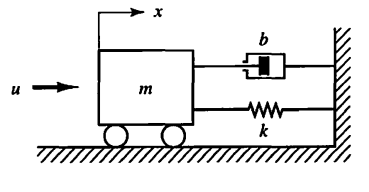

In [2]:
def model(x1,x2,u,b):
    k = 10000.0 # stiffness is Nm
    m = 1.0 #mass is 1 kg
    dx1dt = x2
    dx2dt = -(k/m)*x1 -(b/m)*x2 + u/m
    dx1dt = np.float64(dx1dt)
    dx2dt = np.float64(dx2dt)
    dz = np.array([dx1dt,dx2dt])
    return dz

In [3]:
def forwardeuler(dz,z,step):
    z = z + step * dz
    return z

In [4]:
def PO(x2,F,step):
    E = step*F*x2
    return E

In [5]:
def PC(E, x2, F, alpha, step):
    E = PO(x2,F,step)
    v2 = x2

    E = E + (alpha)*step*F**2
    eps = 1e-6
    if E < 0:
        alpha = -E/(step*(F**2+eps))
    else:
        alpha = 0
    
    v1 = v2 + (alpha)*v2
    return v1,alpha,E

In [6]:
#Time 
deltat = 0.0001
tf = 10
ti = 0
n = int(((tf-ti)/deltat)+1)
t = np.linspace(ti,tf,n)

In [7]:
x1arr = np.zeros(n,dtype=np.float64)
x2arr = np.zeros(n,dtype=np.float64)
v1arr = np.zeros(n,dtype=np.float64)

Earr = np.zeros(n,dtype=np.float64)
x1 = np.float64(0.0)
x2 = np.float64(0.0)
z = np.zeros((2), dtype=np.float64)
Estor = 0
E = 0
alpha = 0

In [8]:
uarr = np.zeros(n)
uarr[1001:n] = 10 # 10 Newton force
#uarr = 10*np.sin(t)

In [9]:
for i in range(n):
    b = 100 # For now damping is set to constant number
    
    dz = model(z[0],z[1],uarr[i],b)
    z = forwardeuler(dz,z,deltat)
    v1, alpha,E = PC(Estor,z[1], uarr[i], alpha, deltat)
    v1arr[i] = v1
    Estor += E
    Earr[i] = E
    x1arr[i] = z[0]
    x2arr[i] = z[1]

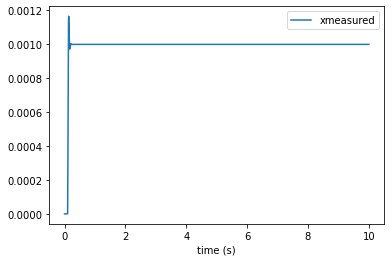

In [10]:
plt.figure(1)
plt.xlabel("time (s)")
plt.plot(t,x1arr,label = 'xmeasured')

plt.legend()

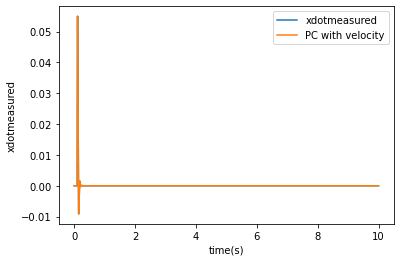

In [11]:
plt.figure(2)
plt.xlabel("time(s)")
plt.ylabel('xdotmeasured')
plt.plot(t,x2arr,label = 'xdotmeasured')
plt.plot(t,v1arr,label = 'PC with velocity')
plt.legend()


Total Energy is 0.010995385398084038


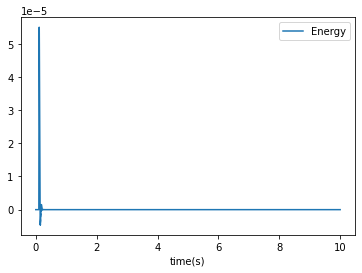

In [12]:
plt.figure(3)
plt.xlabel("time(s)")
plt.plot(t,Earr,label = 'Energy')
plt.legend()
print('Total Energy is',Estor)